In [112]:
import pandas as pd
import matplotlib.pyplot as mpl
import cv2
import numpy as np

In [113]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
d = unpickle('data_batch_1')
print(d.keys())
img = d[b'data'][0]
img = img.reshape(3,32,32)
img = img.transpose(1,2,0)
print(img)

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


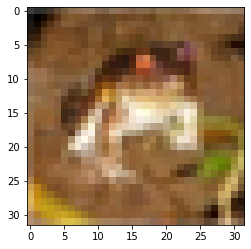

In [114]:
mpl.imshow(img)

In [115]:
data = d[b'data']
data = data.reshape(len(data),3,32,32).transpose(0,2,3,1)
print(data.shape)

(10000, 32, 32, 3)


In [116]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
b = unpickle('batches.meta')

In [117]:
dic = {b'airplane' : [], b'automobile' : [], b'bird'  : [], b'cat' : [], b'deer' : [], b'dog' : [], b'frog' : [], b'horse' : [], b'ship' : [], b'truck' : []}
def show(file,labels):
    
    dic[b[b'label_names'][labels]].append(file)
   
    
for i in range(10000):
    show(data[i],d[b'labels'][i])

    

In [118]:
with open("output.txt", "a") as f:
  print(dic, file=f)
  

In [119]:
#dont be over confident
labels = []
for i in d[b'labels']:
    labels.append(b[b'label_names'][i].decode())
print(len(labels))

10000


In [120]:
from sklearn.model_selection import train_test_split

In [142]:
x_train,x_test,y_train,y_test = train_test_split(d[b'data'],labels,test_size = 0.20)


deer


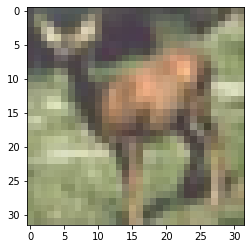

In [143]:
img = x_test[2]
img = img.reshape(3,32,32)
img = img.transpose(1,2,0)
mpl.imshow(img)
print(y_test[2])

In [144]:
y_train = np.array(y_train)

print(x_train.shape,y_train.shape)


(8000, 3072) (8000,)


In [138]:
from sklearn.svm import SVC

In [147]:
from sklearn.metrics import accuracy_score
def pred(c):
    model = SVC(C=c,kernel='rbf',probability = False,gamma='auto')
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    score = accuracy_score(y_test,prediction)
    accy.append(score*100)  


In [153]:
c_svm_linear = [1]
accy = [] #accuracy
for i in c_svm_linear:
    pred(i)
print(accy)

[43.85]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


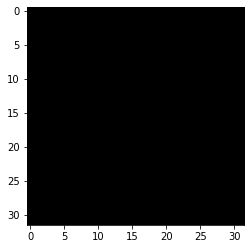

In [66]:
img = x_train[1]
img = img.reshape(3,32,32)
img = img.transpose(1,2,0)
mpl.imshow(img)

In [135]:
count = 0
for i,j in zip(y_test,prediction):
    
    print(i,j)


horse cat
frog cat
deer cat
airplane cat
frog cat
truck cat
cat cat
frog airplane
dog cat
frog cat
deer cat
cat cat
frog cat
airplane cat
horse cat
airplane cat
automobile cat
frog cat
cat cat
cat cat
ship cat
bird cat
ship cat
bird cat
airplane cat
bird cat
ship cat
dog cat
dog cat
frog cat
airplane cat
horse cat
automobile cat
bird cat
frog cat
frog cat
automobile cat
airplane cat
bird cat
cat cat
dog cat
airplane cat
frog cat
deer cat
bird cat
ship cat
dog cat
airplane cat
frog cat
cat cat
truck cat
ship cat
airplane cat
ship cat
cat cat
airplane cat
cat cat
deer cat
frog cat
dog airplane
bird cat
deer cat
dog cat
cat cat
airplane cat
horse cat
truck cat
airplane cat
dog cat
truck cat
horse cat
airplane cat
horse cat
horse airplane
frog cat
bird cat
frog cat
bird cat
bird cat
bird airplane
truck cat
airplane cat
frog cat
dog cat
bird cat
ship airplane
deer cat
bird cat
ship cat
bird cat
ship airplane
dog cat
bird cat
horse cat
dog cat
ship cat
cat cat
deer cat
horse cat
deer cat
cat

In [95]:
print(d[b'labels'])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

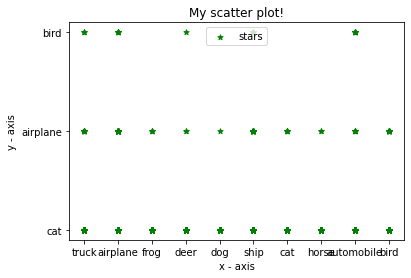

In [104]:

import matplotlib.pyplot as plt
  
# x-axis values
x = y_train
# y-axis values
y = prediction
  
# plotting points as a scatter plot
plt.scatter(x, y, label= "stars", color= "green", 
            marker= "*", s=30)
  
# x-axis label
plt.xlabel('x - axis')
# frequency label
plt.ylabel('y - axis')
# plot title
plt.title('My scatter plot!')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()